In [16]:
from astropy.io import fits
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

In [17]:
quasar_n = fits.getdata('/uufs/chpc.utah.edu/common/home/astro/zheng/hd/data/SDSS16Q/eBOSS_QSO_clustering_data-NGC-vDR16.fits')
quasar_s = fits.getdata('/uufs/chpc.utah.edu/common/home/astro/zheng/hd/data/SDSS16Q/eBOSS_QSO_clustering_data-SGC-vDR16.fits')
quasar_all = np.hstack((quasar_n, quasar_s))

In [18]:
random_n = fits.getdata('/uufs/chpc.utah.edu/common/home/astro/zheng/hd/data/SDSS16Q/eBOSS_QSO_clustering_random-NGC-vDR16.fits')
random_s = fits.getdata('/uufs/chpc.utah.edu/common/home/astro/zheng/hd/data/SDSS16Q/eBOSS_QSO_clustering_random-SGC-vDR16.fits')
random_all = np.hstack((random_n, random_s))

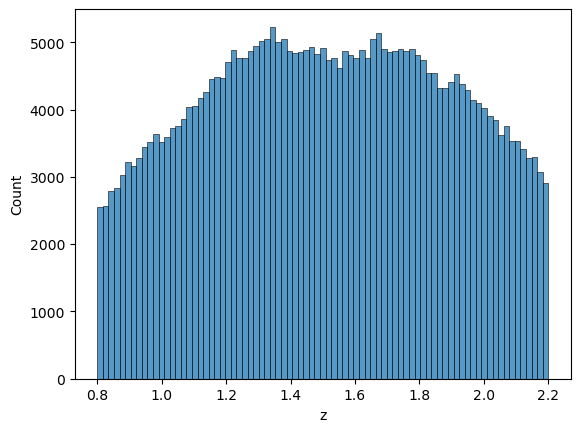

In [10]:
import seaborn as sns
fig = plt.figure()
ax = fig.add_subplot()
sns.histplot(quasar_all['Z'], ax=ax)
ax.set_xlabel('z')
plt.savefig('./fig/quasar_lss_z')

In [19]:
quasar = quasar_all[np.logical_and(quasar_all['Z']<2, quasar_all['Z']>1)]

In [26]:
len(quasar)

267344

In [20]:
quasar_cata = np.zeros(len(quasar), dtype=[('ra', 'f8'), ('dec', 'f8'), ('z', 'f8'), ('w', 'f8')])
quasar_cata['ra'] = quasar['RA']
quasar_cata['dec'] = quasar['DEC']
quasar_cata['z'] = quasar['Z']
quasar_cata['w'] = quasar['WEIGHT_SYSTOT']*quasar['WEIGHT_FKP']*(quasar['WEIGHT_NOZ'] + quasar['WEIGHT_CP'] - 1)
np.save('../catalogue/quasar_lss', quasar_cata)

In [21]:
random = random_all[np.logical_and(random_all['Z']<2, random_all['Z']>1)]

In [27]:
random_cata = np.zeros(len(random), dtype=[('ra', 'f8'), ('dec', 'f8'), ('z', 'f8'), ('w', 'f8')])
random_cata['ra'] = random['RA']
random_cata['dec'] = random['DEC']
random_cata['z'] = random['Z']
random_cata['w'] = random['WEIGHT_FKP']
# random_cata['w'] = random['WEIGHT_SYSTOT']*random['WEIGHT_FKP']*(random['WEIGHT_NOZ'] + random['WEIGHT_CP'] - 1)
np.save('../catalogue/random_quasar_lss', np.random.choice(random_cata, len(quasar_cata)*20, replace=False))

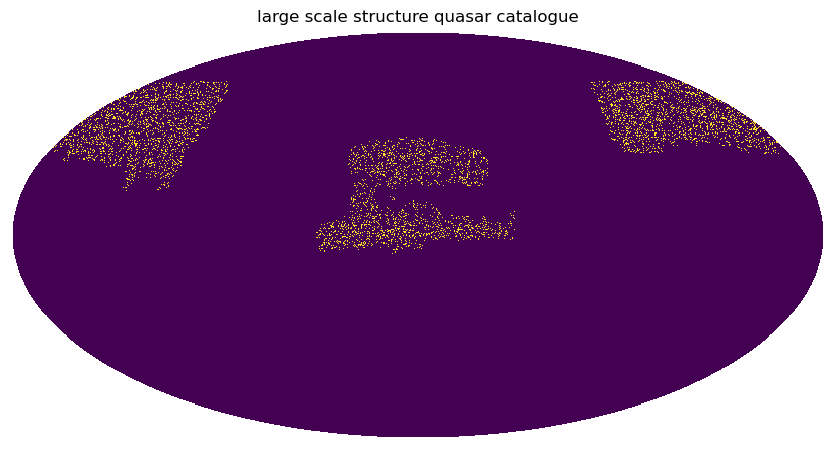

In [23]:
image = np.zeros(hp.nside2npix(1024))
image[hp.ang2pix(1024, np.deg2rad(90-quasar_cata['dec']), np.deg2rad(quasar_cata['ra']))] = 1
hp.mollview(image, title='large scale structure quasar catalogue', cbar=False)
plt.savefig('./fig/lss')

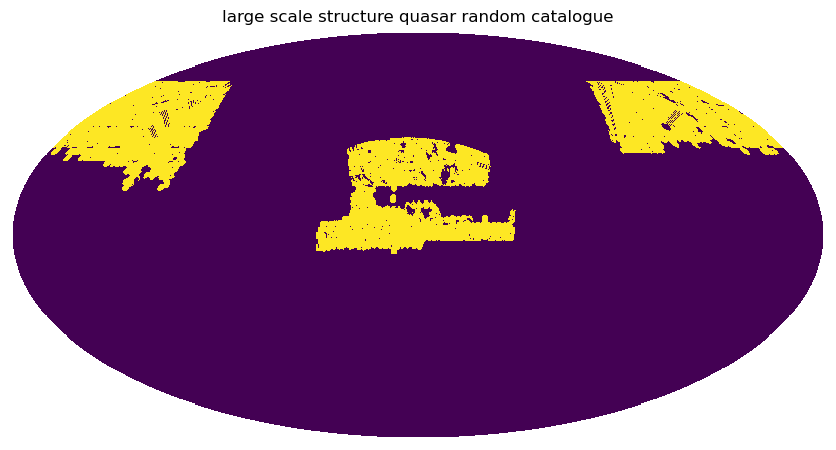

In [25]:
image = np.zeros(hp.nside2npix(1024))
image[hp.ang2pix(1024, np.deg2rad(90-random_cata['dec']), np.deg2rad(random_cata['ra']))] = 1
hp.mollview(image, title='large scale structure quasar random catalogue', cbar=False)